In [69]:
import numpy as np
import pandas as pd
from ta.utils import dropna
from ta.volatility import BollingerBands
import config
import ccxt
from bsedata.bse import BSE
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [66]:
#When the price timeseries p(t) crosses the EMA timeseries e(t) from below, we will close any existing short position and 
#go long (buy) one unit of the asset.

#When the price timeseries p(t) crosses the EMA timeseries e(t) from above, we will close any existing long position and 
#go short (sell) one unit of the asset.
'''
Go long condition: If pi(t)>ei(t), then wi(t)=1
Go short condition: If pi(t)<ei(t), then wi(t)=−1
'''

In [52]:
# Calculating the long-window simple moving average
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

,Open,High,Low,Close,Adj Close,Volume,20d_EMA,40d_EMA
Date,,,,,,,,
2021-04-26,329.673001,335.1160,324.049501,329.6435,329.6435,2893300.34,318.174991,302.924611
2021-04-27,330.677501,336.2030,325.076001,330.7180,330.7180,2901318.29,319.369564,304.280386
2021-04-28,331.772001,337.3850,326.210501,331.9080,331.9080,2910096.50,320.563700,305.628075
2021-04-29,332.981001,338.5950,327.322501,333.0200,333.0200,2927721.18,321.750015,306.964266
2021-04-30,334.044501,339.7115,328.387001,334.0865,334.0865,2929685.25,322.924918,308.287302


In [64]:
# Calculating the short-window simple moving average
short_rolling = data.rolling(window=20).mean()
short_rolling

,Open,High,Low,Close,Adj Close,Volume,20d_EMA,40d_EMA
Date,,,,,,,,
2019-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-04-26,349.142500,354.470003,342.825000,348.487500,348.487500,2699834.20,362.992221,361.077570
2021-04-27,347.940001,353.750002,342.042500,348.137500,348.137500,2803561.90,361.577486,360.446347
2021-04-28,347.717502,353.920003,342.565001,348.545000,348.545000,2769029.15,360.336297,359.865793


In [63]:
ema_short = data.ewm(span=20, adjust=False).mean()
ema_short                  

,Open,High,Low,Close,Adj Close,Volume,20d_EMA,40d_EMA
Date,,,,,,,,
2019-05-03,308.100006,311.500000,308.100006,309.149994,309.149994,2.895175e+06,309.149994,309.149994
2019-05-06,308.071433,311.357143,307.890481,309.107138,309.107138,2.678005e+06,309.145912,309.147903
2019-05-07,308.283676,311.446938,307.524720,308.796935,308.796935,2.603530e+06,309.112677,309.130783
2019-05-08,308.013803,310.875802,306.522366,307.778180,307.778180,2.483946e+06,308.985582,309.064802
2019-05-09,307.145822,309.930489,305.515475,306.965973,306.965973,2.366848e+06,308.793238,308.962420
...,...,...,...,...,...,...,...,...
2021-04-26,347.668927,353.796991,342.182165,348.221993,348.221993,2.792466e+06,360.354726,358.167145
2021-04-27,347.400458,353.892514,342.255293,348.667517,348.667517,2.882454e+06,359.241659,357.703748
2021-04-28,348.167082,354.874181,343.511933,350.061085,350.061085,2.926848e+06,358.367318,357.330935


In [67]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = data - ema_short
trading_positions_raw.tail()

,Open,High,Low,Close,Adj Close,Volume,20d_EMA,40d_EMA
Date,,,,,,,,
2021-04-26,-9.518933,-6.596979,-4.032171,-3.871987,-3.871987,5.633686e+05,-12.132733,-4.845074
2021-04-27,-2.550452,0.907473,0.694719,4.232477,4.232477,8.548838e+05,-10.574142,-4.402267
2021-04-28,7.282930,9.325831,11.938079,13.238902,13.238902,4.217410e+05,-8.306233,-3.541722
2021-04-29,15.863127,13.594783,10.801119,8.313780,8.313780,1.607225e+06,-6.723375,-2.963405
2021-04-30,4.671390,5.559582,5.339086,2.274383,2.274383,2.166754e+05,-5.866445,-2.707903


In [74]:
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/3
trading_positions = trading_positions_raw.apply(np.sign) 
trading_positions.tail()

,Open,High,Low,Close,Adj Close,Volume,20d_EMA,40d_EMA
Date,,,,,,,,
2021-04-26,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
2021-04-27,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
2021-04-28,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
2021-04-29,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
2021-04-30,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0


In [75]:
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)

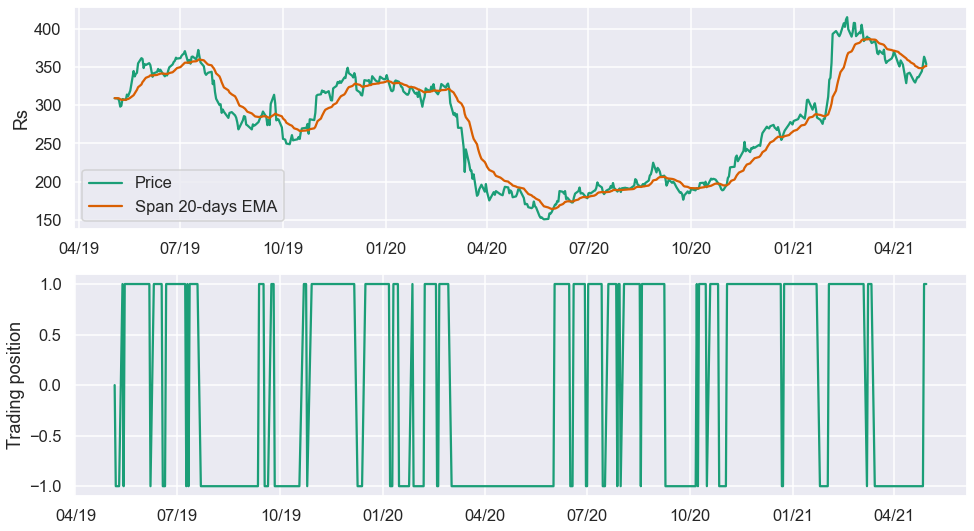

In [77]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close'], label='Price')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = 'Span 20-days EMA')

ax1.set_ylabel('Rs')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'Close'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [80]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
asset_log_returns = np.log(data).diff()
asset_log_returns

,Open,High,Low,Close,Adj Close,Volume,20d_EMA,40d_EMA
Date,,,,,,,,
2019-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-06,-0.000974,-0.004827,-0.007166,-0.001457,-0.001457,-1.549357,-0.000139,-0.000071
2019-05-07,0.008089,0.007392,-0.006066,-0.009275,-0.009275,1.126067,-0.001004,-0.000517
2019-05-08,-0.015753,-0.022178,-0.023460,-0.025666,-0.025666,-0.341207,-0.003305,-0.001717
2019-05-09,-0.021677,-0.014842,-0.003542,0.003850,0.003850,-0.071878,-0.002642,-0.001454
...,...,...,...,...,...,...,...,...
2021-04-26,0.018355,0.021102,0.019862,0.023209,0.023209,0.489513,-0.001170,-0.001301
2021-04-27,0.019620,0.021653,0.014095,0.024526,0.024526,0.107673,0.001279,-0.000058
2021-04-28,0.030275,0.026149,0.035800,0.029044,0.029044,-0.109835,0.003989,0.001380


In [81]:
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,Open,High,Low,Close,Adj Close,Volume,20d_EMA,40d_EMA
Date,,,,,,,,
2021-04-26,-0.018355,-0.021102,-0.019862,-0.023209,-0.023209,-0.489513,0.001170,0.001301
2021-04-27,-0.019620,-0.021653,-0.014095,-0.024526,-0.024526,0.107673,-0.001279,0.000058
2021-04-28,-0.030275,0.026149,0.035800,0.029044,0.029044,-0.109835,-0.003989,-0.001380
2021-04-29,0.028429,0.015529,0.000000,-0.011210,-0.011210,0.339716,-0.002497,-0.000753
2021-04-30,-0.029696,-0.020346,-0.013881,-0.016276,-0.016276,-0.343628,-0.000682,0.000083


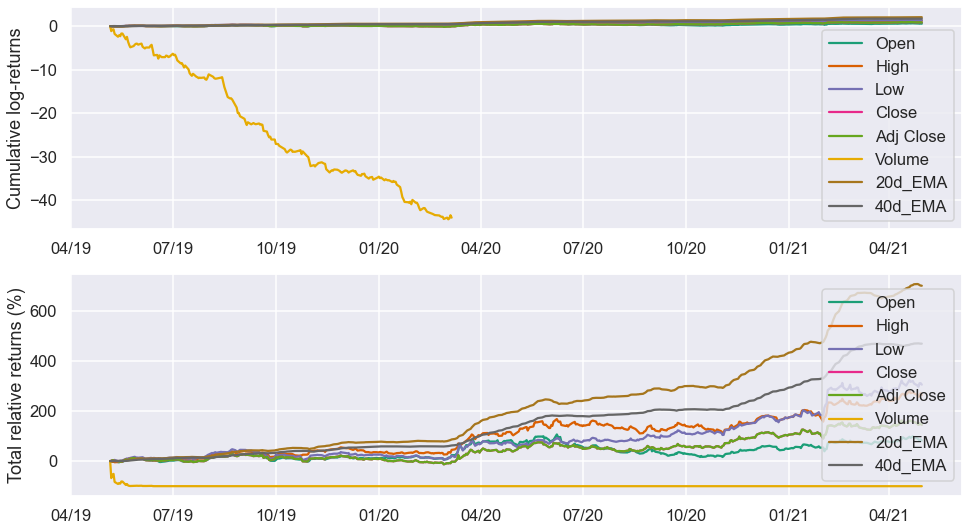

In [82]:
# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)


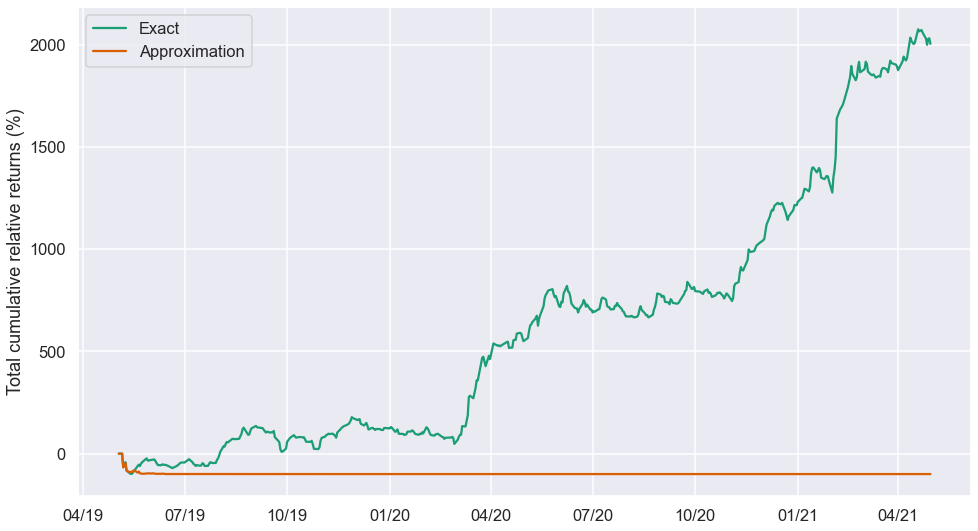

In [83]:
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = np.exp(cum_strategy_log_return) - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Exact')
ax.plot(cum_relative_return_approx.index, 100*cum_relative_return_approx, label='Approximation')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)


In [84]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: 2006.02%
Average yearly return is: 400.48%


Total portfolio return is: 32.50%
Average yearly return is: 16.04%


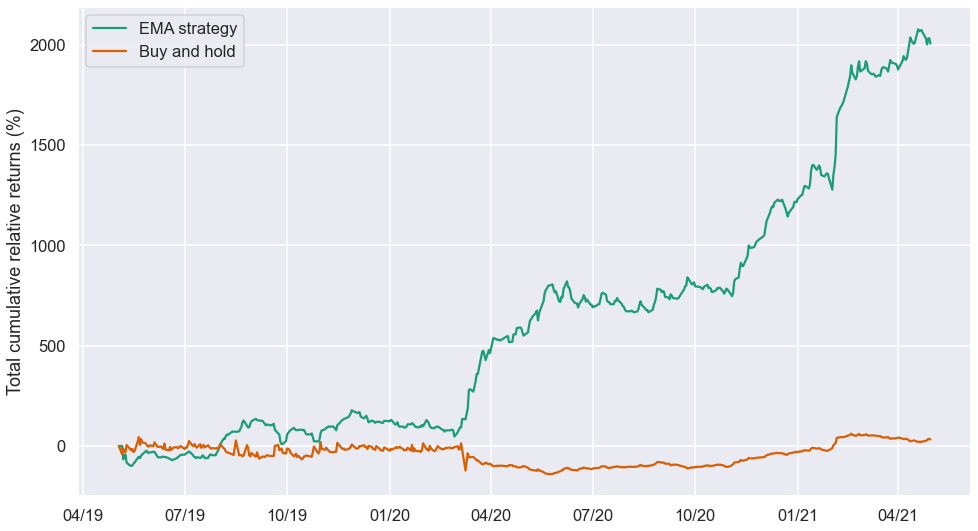

In [85]:
# Define the weights matrix for the simple buy-and-hold strategy
simple_weights_matrix = pd.DataFrame(1/3, index = data.index, columns=data.columns)

# Get the buy-and-hold strategy log returns per asset
simple_strategy_asset_log_returns = simple_weights_matrix * asset_log_returns

# Get the cumulative log-returns per asset
simple_cum_strategy_asset_log_returns = simple_strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
simple_cum_strategy_asset_relative_returns = np.exp(simple_cum_strategy_asset_log_returns) - 1

# Total strategy relative returns. This is the exact calculation.
simple_cum_relative_return_exact = simple_cum_strategy_asset_relative_returns.sum(axis=1)

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='EMA strategy')
ax.plot(simple_cum_relative_return_exact.index, 100*simple_cum_relative_return_exact, label='Buy and hold')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

print_portfolio_yearly_statistics(simple_cum_relative_return_exact)

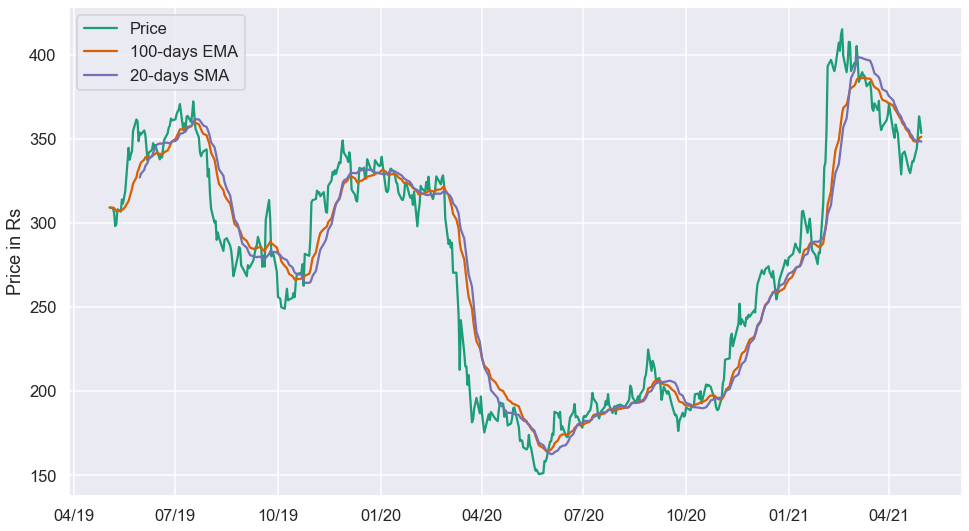

In [65]:
start_date = '2019-05-03'
end_date = '2021-05-03'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = '20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in Rs')
ax.xaxis.set_major_formatter(my_year_month_fmt)

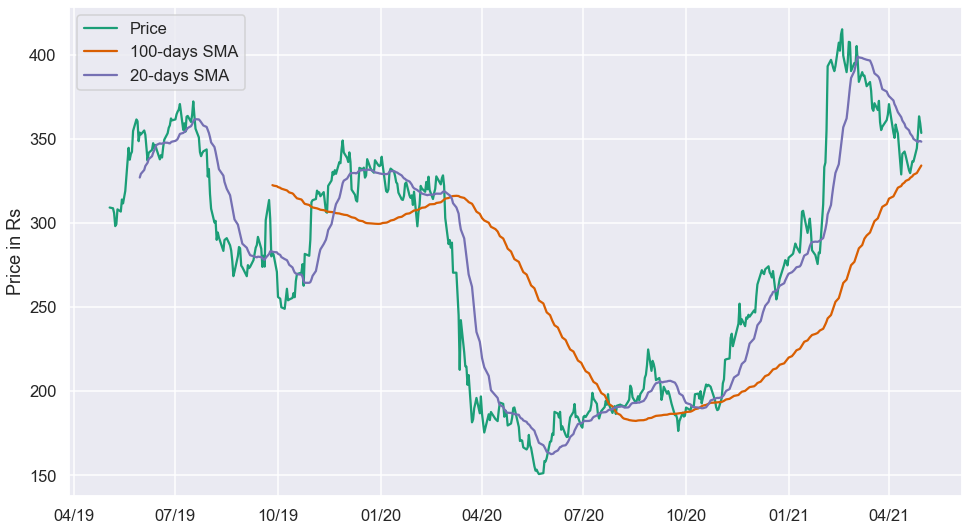

In [62]:
start_date = '2019-05-03'
end_date = '2021-05-03'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in Rs')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [49]:
data

,Open,High,Low,Close,Adj Close,Volume,20d_EMA,40d_EMA
Date,,,,,,,,
2019-05-03,308.100006,311.500000,308.100006,309.149994,309.149994,2895175,309.149994,309.149994
2019-05-06,307.799988,310.000000,305.899994,308.700012,308.700012,614890,309.107138,309.128044
2019-05-07,310.299988,312.299988,304.049988,305.850006,305.850006,1896017,308.796935,308.968139
2019-05-08,305.450012,305.450012,297.000000,298.100006,298.100006,1347901,307.778180,308.437986
2019-05-09,298.899994,300.950012,295.950012,299.250000,299.250000,1254416,306.965973,307.989792
...,...,...,...,...,...,...,...,...
2021-04-26,338.149994,347.200012,338.149994,344.350006,344.350006,3355835,348.221993,353.322071
2021-04-27,344.850006,354.799988,342.950012,352.899994,352.899994,3737338,348.667517,353.301482
2021-04-28,355.450012,364.200012,355.450012,363.299988,363.299988,3348589,350.061085,353.789214


In [45]:
data = yf.download('SBIN.BO', start="2019-05-03", end="2021-05-03")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-03,308.100006,311.500000,308.100006,309.149994,309.149994,2895175
2019-05-06,307.799988,310.000000,305.899994,308.700012,308.700012,614890
2019-05-07,310.299988,312.299988,304.049988,305.850006,305.850006,1896017
2019-05-08,305.450012,305.450012,297.000000,298.100006,298.100006,1347901
2019-05-09,298.899994,300.950012,295.950012,299.250000,299.250000,1254416


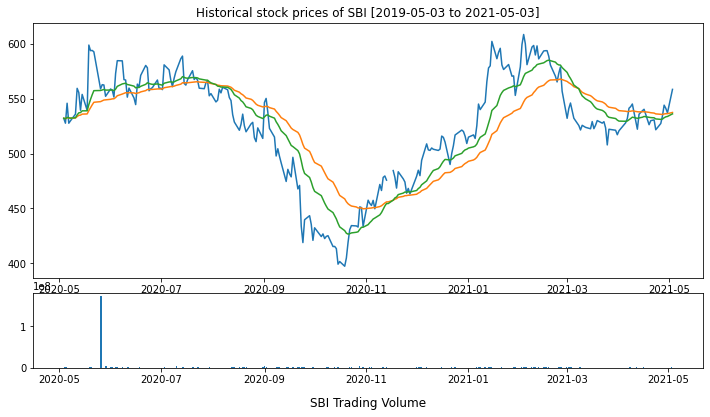

In [51]:
#df = pd.read_csv('BHARTIARTL.csv')
data['20d_EMA'] = data.Close.ewm(span=20, adjust=False).mean()
data['40d_EMA'] = data.Close.ewm(span=40, adjust=False).mean()

df1 = df.loc[new_df]
df['Date'] = pd.to_datetime(df['Date']) 

start_date = pd.to_datetime('2019-05-03')
end_date = pd.to_datetime('2021-05-03') 
new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
df1 = df.loc[new_df]
stock_data = df1.set_index('Date')
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(stock_data.index, stock_data[["Close",'40d_EMA','20d_EMA']])
plt.title('Historical stock prices of SBI [2019-05-03 to 2021-05-03]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_data.index, stock_data['Volume'])
plt.title('\nSBI Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)

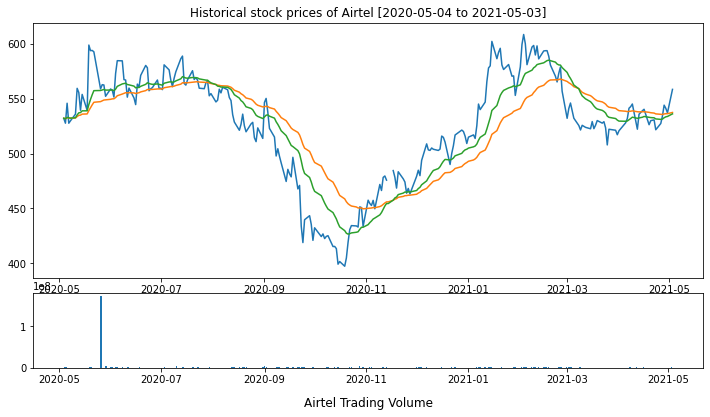

In [47]:
df = pd.read_csv('BHARTIARTL.csv')
df['20d_EMA'] = df.Close.ewm(span=20, adjust=False).mean()
df['40d_EMA'] = df.Close.ewm(span=40, adjust=False).mean()

df1 = df.loc[new_df]
df['Date'] = pd.to_datetime(df['Date']) 

start_date = pd.to_datetime('2019-05-04')
end_date = pd.to_datetime('2021-05-03') 
new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
df1 = df.loc[new_df]
stock_data = df1.set_index('Date')
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(stock_data.index, stock_data[["Close",'40d_EMA','20d_EMA']])
plt.title('Historical stock prices of Airtel [2020-05-04 to 2021-05-03]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_data.index, stock_data['Volume'])
plt.title('\nAirtel Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)

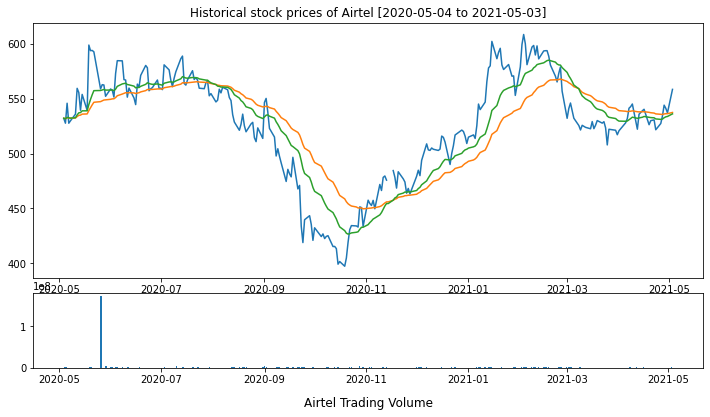

In [34]:
df['Date'] = pd.to_datetime(df['Date']) 

start_date = pd.to_datetime('2020-05-04')
end_date = pd.to_datetime('2021-05-03') 
new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
df1 = df.loc[new_df]
stock_data = df1.set_index('Date')
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(stock_data.index, stock_data[["Close",'40d_EMA','20d_EMA']])
plt.title('Historical stock prices of Airtel [2020-05-04 to 2021-05-03]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_data.index, stock_data['Volume'])
plt.title('\nAirtel Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)

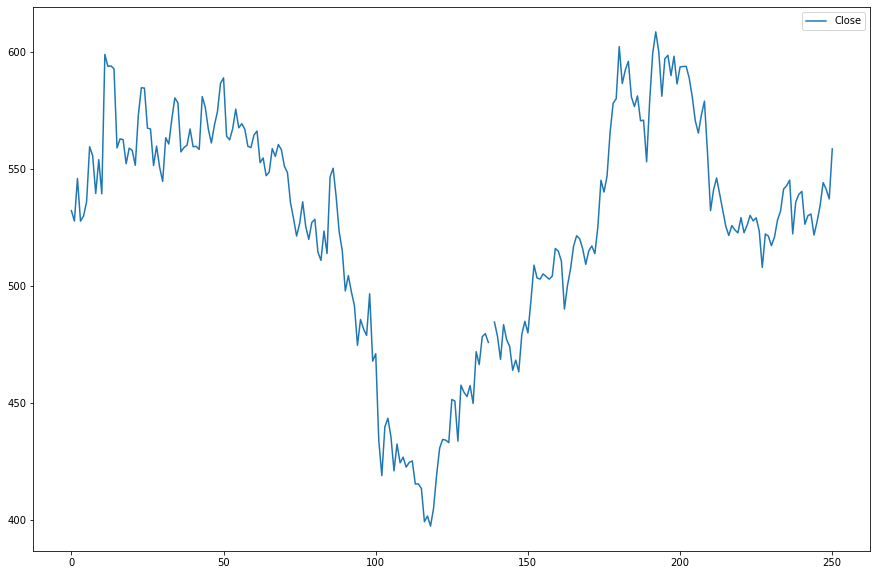

In [18]:
#visualization
plt.figure(figsize=(10,5))
df['Close'].plot(figsize=(15,10))
plt.legend()
plt.show()

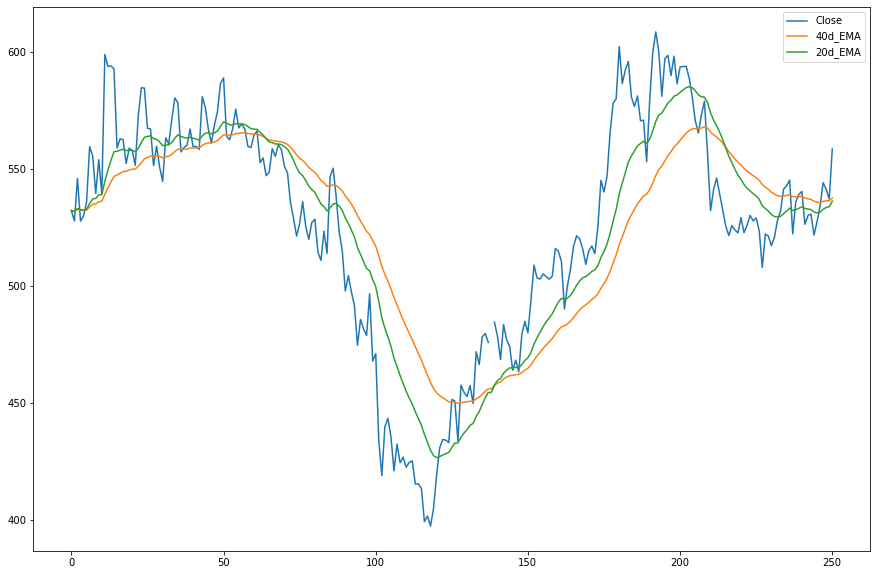

In [23]:
df['20d_EMA'] = df.Close.ewm(span=20, adjust=False).mean()
df['40d_EMA'] = df.Close.ewm(span=40, adjust=False).mean()
#df['middle'] = df.Close.ewm(span=71, adjust=False).mean()
df[['Close','40d_EMA','20d_EMA']].plot(figsize=(15,10))
plt.show()

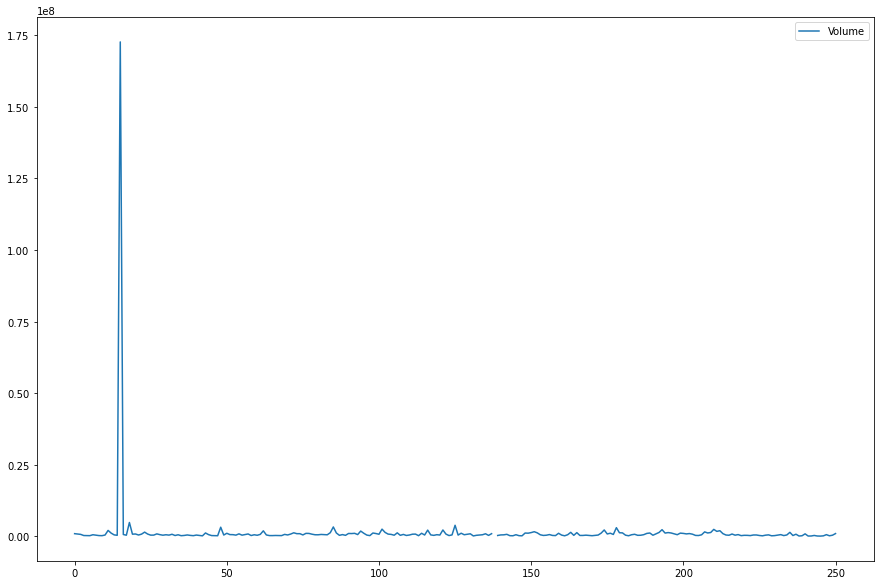

In [25]:
df[['Volume']].plot(figsize=(15,10))
plt.show()

In [21]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,20d_EMA,40d_EMA
0,2020-05-04,510.000000,540.049988,499.000000,532.299988,530.395020,975688.0,532.299988,532.299988
1,2020-05-05,539.950012,553.500000,526.049988,527.849976,525.960938,856677.0,531.876177,532.082914
2,2020-05-06,533.000000,551.349976,530.799988,546.049988,544.095764,726696.0,533.226064,532.764235
3,2020-05-07,546.799988,546.799988,524.599976,527.799988,525.911133,327050.0,532.709295,532.522077
4,2020-05-08,539.849976,545.849976,528.500000,530.000000,528.103271,312522.0,532.451267,532.399048
...,...,...,...,...,...,...,...,...,...
246,2021-04-27,528.000000,538.400024,526.950012,534.450012,534.450012,211144.0,531.620596,535.826236
247,2021-04-28,536.000000,547.950012,536.000000,544.299988,544.299988,634840.0,532.828157,536.239589
248,2021-04-29,547.200012,549.950012,539.150024,541.400024,541.400024,237453.0,533.644525,536.491318
249,2021-04-30,535.500000,546.900024,533.349976,537.299988,537.299988,437898.0,533.992664,536.530765


In [9]:
start_date = '2020-05-04'
end_date = '2021-05-03'
ema_short = df.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'MSFT'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'MSFT'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'MSFT'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

'2020-05-05'

In [16]:
ema_short = df.ewm(span=20, adjust=False).mean()

In [17]:
ema_short

,Open,High,Low,Close,Adj Close,Volume
0,510.000000,540.049988,499.000000,532.299988,530.395020,975688.000000
1,512.852382,541.330942,501.576189,531.876177,529.972726,964353.619048
2,514.771203,542.285135,504.359408,533.226064,531.317778,941719.560091
3,517.821563,542.715121,506.287081,532.709295,530.802859,883179.601987
4,519.919507,543.013679,508.402597,532.451267,530.545755,828831.258940
...,...,...,...,...,...,...
246,532.433270,537.722077,525.936707,531.620596,531.620596,401353.658926
247,532.772958,538.696166,526.895116,532.828157,532.828157,423590.453314
248,534.146963,539.767961,528.062250,533.644525,533.644525,405863.076808
249,534.275824,540.447205,528.565843,533.992664,533.992664,408914.021874
